In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

In [ ]:
def predictions(company):
    dataset=yf.download(company,start='2016-01-07',  end='2022-01-07')[['Close']]
    dataset=pd.concat([dataset, dataset.shift(), dataset.shift(2),dataset.shift(3),dataset.shift(4),dataset.shift(5),
               dataset.shift(6),dataset.shift(7),dataset.shift(8),dataset.shift(9),dataset.shift(10)], axis=1).dropna()
    dataset.columns=list(range(0,11))
    dataset.rename(columns={0:'actual_stock_price'},inplace=True)
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(dataset[list(range(1,11))],dataset['actual_stock_price'])
    dataset['predictions']=lr.predict(dataset[list(range(1,11))])
    plott=dataset[['actual_stock_price','predictions']].plot(figsize=(200,50))
    return(plott)

[*********************100%***********************]  1 of 1 completed


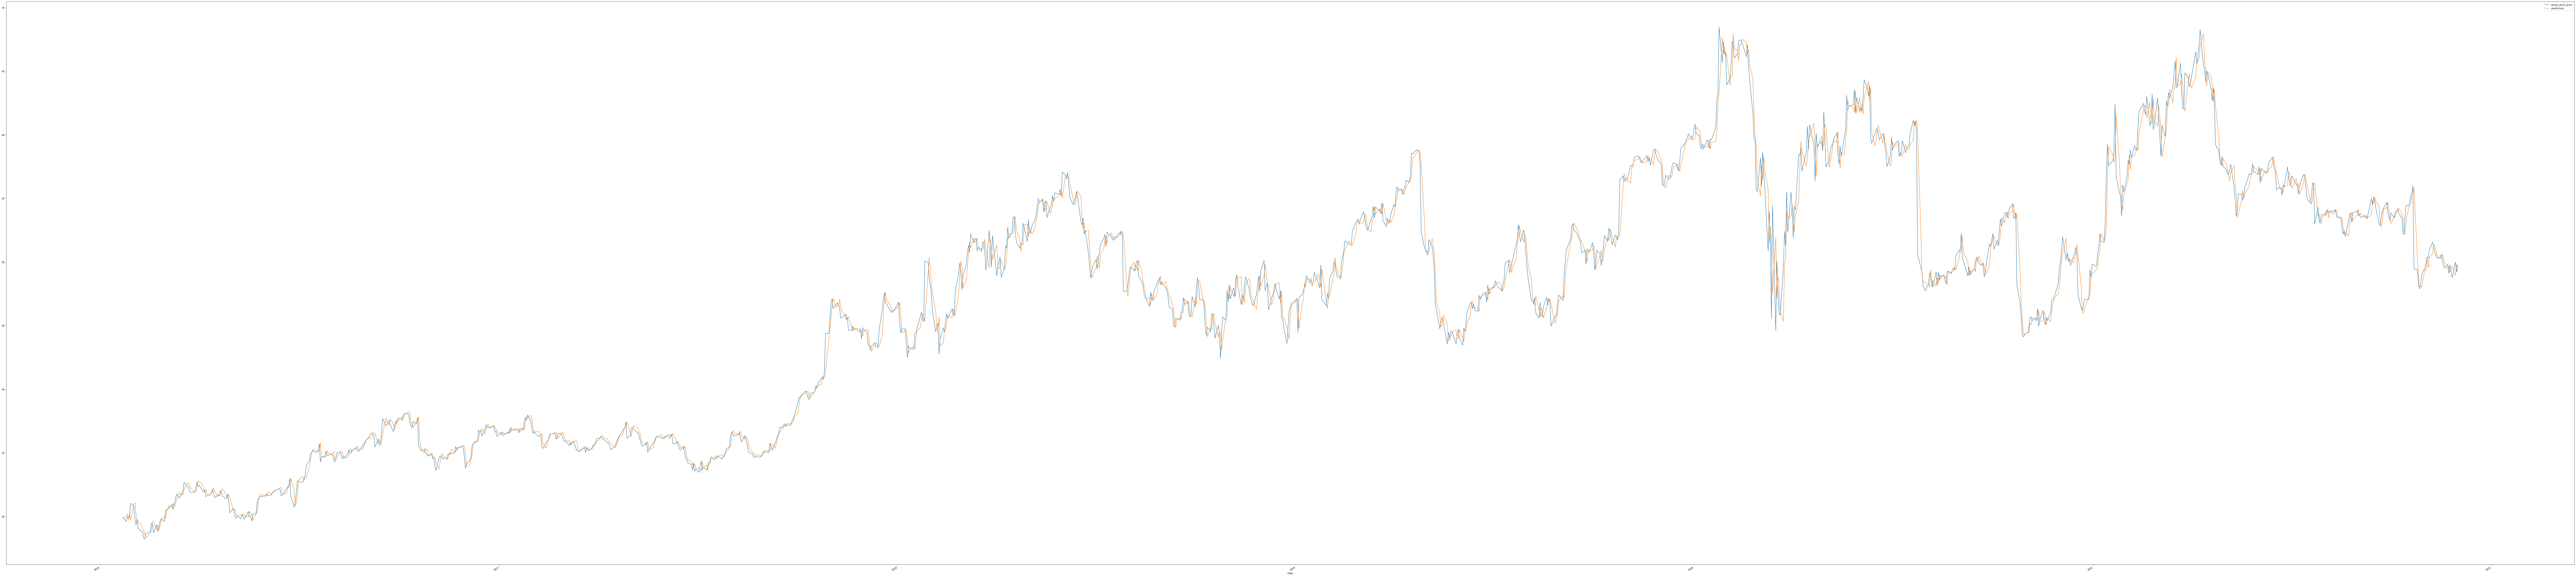

In [ ]:
predictions('INTC')

[*********************100%***********************]  1 of 1 completed


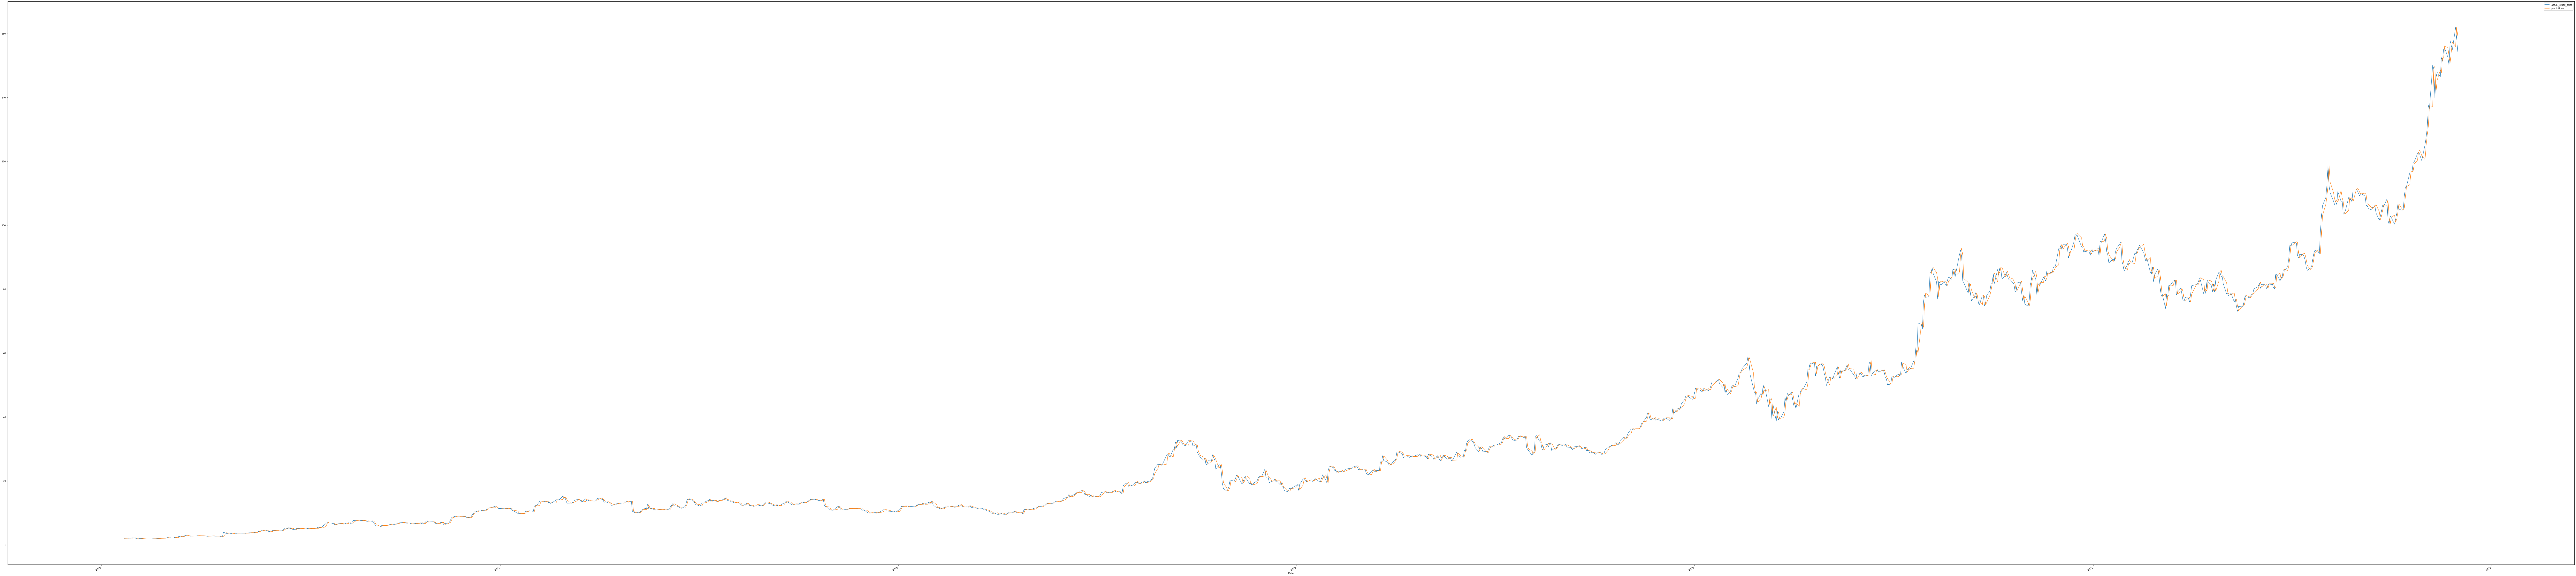

In [ ]:
predictions('AMD')